# Association Rules

In [1]:
!pip install  mlxtend

In [2]:
!pip install nsepython

In [3]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns 
from nsepython import * 

C:\Users\thang\anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\thang\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [7]:
movie = pd.read_csv("C:/Users/thang/Downloads/my_movies.csv")
movie

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [8]:
movie.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


# EDA

In [10]:
movie.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
movie.drop(movie.iloc[:, :5], inplace=True, axis=1)
movie

,Harry Potter2,LOTR,Braveheart,Green Mile
0,0,0,0,1
1,0,0,1,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
5,0,0,0,0
6,1,0,0,0
7,0,0,0,0
8,0,0,0,0
9,0,1,0,1


In [15]:
frequent_itemsets = apriori(movie, min_support=0.1, use_colnames=True)
frequent_itemsets

C:\Users\thang\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.1,(Harry Potter2)
1,0.1,(LOTR)
2,0.1,(Braveheart)
3,0.2,(Green Mile)
4,0.1,"(Green Mile, LOTR)"


In [16]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Green Mile),(LOTR),0.2,0.1,0.1,0.5,5.0,0.08,1.8
1,(LOTR),(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf


In [17]:
rules.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Green Mile),(LOTR),0.2,0.1,0.1,0.5,5.0,0.08,1.8
1,(LOTR),(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf


## An leverage value of 0 indicates independence. Range will be [-1 1]

In [18]:
#A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [19]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Green Mile),(LOTR),0.2,0.1,0.1,0.5,5.0,0.08,1.8
1,(LOTR),(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf


In [20]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Green Mile),(LOTR),0.2,0.1,0.1,0.5,5.0,0.08,1.8
1,(LOTR),(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf


# Visulization for Association Rules

array([[<AxesSubplot:title={'center':'support'}>,
        <AxesSubplot:title={'center':'confidence'}>]], dtype=object)

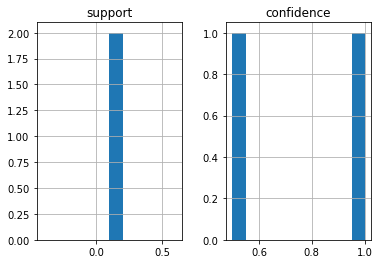

In [21]:
rules[['support','confidence']].hist()

array([[<AxesSubplot:title={'center':'support'}>,
        <AxesSubplot:title={'center':'confidence'}>],
       [<AxesSubplot:title={'center':'lift'}>, <AxesSubplot:>]],
      dtype=object)

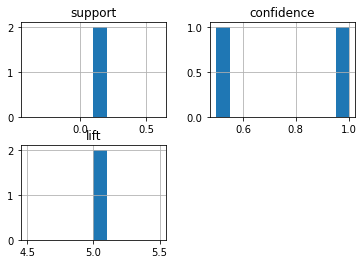

In [22]:
rules[['support','confidence','lift']].hist()

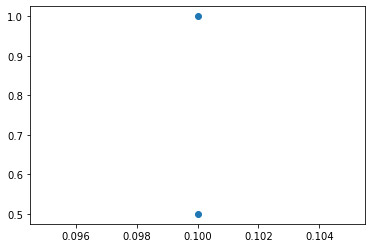

In [23]:
#scatter plot
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

plt.scatter(rules['support'], rules['confidence'])
plt.show()

C:\Users\thang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


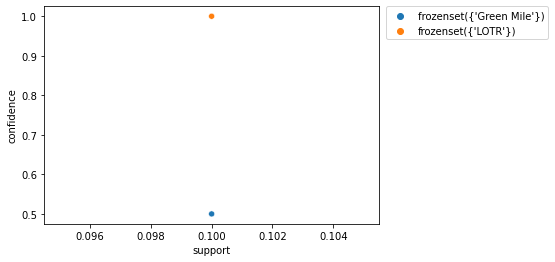

In [24]:
sns.scatterplot('support', 'confidence', data=rules, hue='antecedents')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

C:\Users\thang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


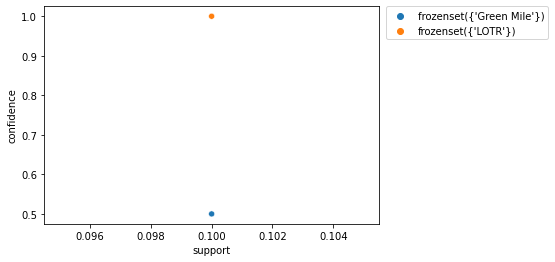

In [25]:
sns.scatterplot('support', 'confidence', data=rules, hue='antecedents')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [26]:
print(indices)

['NIFTY', 'FINNIFTY', 'BANKNIFTY']


In [27]:
oi_data, ltp, crontime = oi_chain_builder("RELIANCE","latest","full")

C:\Users\thang\anaconda3\lib\site-packages\nsepython\rahu.py:147: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  oi_data = oi_data.append(oi_row, ignore_index=True)
C:\Users\thang\anaconda3\lib\site-packages\nsepython\rahu.py:147: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  oi_data = oi_data.append(oi_row, ignore_index=True)
C:\Users\thang\anaconda3\lib\site-packages\nsepython\rahu.py:147: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  oi_data = oi_data.append(oi_row, ignore_index=True)
C:\Users\thang\anaconda3\lib\site-packages\nsepython\rahu.py:147: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  oi_data = oi_data.append(oi_row, ignore_

C:\Users\thang\anaconda3\lib\site-packages\nsepython\rahu.py:147: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  oi_data = oi_data.append(oi_row, ignore_index=True)
C:\Users\thang\anaconda3\lib\site-packages\nsepython\rahu.py:147: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  oi_data = oi_data.append(oi_row, ignore_index=True)
C:\Users\thang\anaconda3\lib\site-packages\nsepython\rahu.py:147: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  oi_data = oi_data.append(oi_row, ignore_index=True)
C:\Users\thang\anaconda3\lib\site-packages\nsepython\rahu.py:147: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  oi_data = oi_data.append(oi_row, ignore_

In [28]:
print(oi_data)

   CALLS_Chart CALLS_OI CALLS_Chng in OI CALLS_Volume CALLS_IV CALLS_LTP  \
0          0.0      0.0              0.0          0.0      0.0       0.0   
1          0.0      7.0              0.0          3.0   375.75     646.0   
2          0.0      0.0              0.0          0.0      0.0       0.0   
3          0.0      0.0              0.0          0.0      0.0       0.0   
4          0.0      0.0              0.0          0.0      0.0       0.0   
..         ...      ...              ...          ...      ...       ...   
58         0.0     37.0              0.0          4.0   110.56      0.05   
59         0.0      7.0              0.0          0.0      0.0       0.0   
60         0.0     10.0              0.0          0.0      0.0       0.0   
61         0.0    137.0              0.0          2.0   121.23      0.05   
62         0.0      0.0              0.0          0.0      0.0       0.0   

   CALLS_Net Chng CALLS_Bid Qty CALLS_Bid Price CALLS_Ask Price  ...  \
0             0

In [29]:
print(ltp)

2628.0


In [30]:
print(crontime)

25-Aug-2022 15:30:00
